In [ ]:
# !pip install shapely

https://shapely.readthedocs.io/en/latest/project.html#usage

In [2]:
import yaml
from PIL import Image, ImageDraw
from shapely.geometry import Point, Polygon

RED = (255, 0, 0)  # For objects within the ROI

In [3]:
origin_point = Point(0, 0)
print(origin_point)
x, y = origin_point.xy
print(x[0])
print(y[0])

POINT (0 0)
0.0
0.0


takes and returns tuple of x, y coords

In [4]:
list(origin_point.coords)

[(0.0, 0.0)]

In [5]:
with open('test.yaml') as file:
    yaml = yaml.load(file, Loader=yaml.FullLoader)
    roi_points = []
    for p in yaml['roi_points']:
        roi_points.append(tuple(p))

print(roi_points)
poly = Polygon(roi_points)
print(poly.area)

test_point_1 = Point(100, 100) # Outside our polygon
test_point_2 = Point(400, 400) # Inside our polygon

camera = Image.open('camera.jpg')
draw = ImageDraw.Draw(camera)

draw.point(list(test_point_1.coords), fill=RED)
draw.point(list(test_point_2.coords), fill=RED)
draw.polygon(roi_points, outline='LightGreen')

[(300, 0), (440, 0), (1250, 1070), (400, 1070)]
529650.0


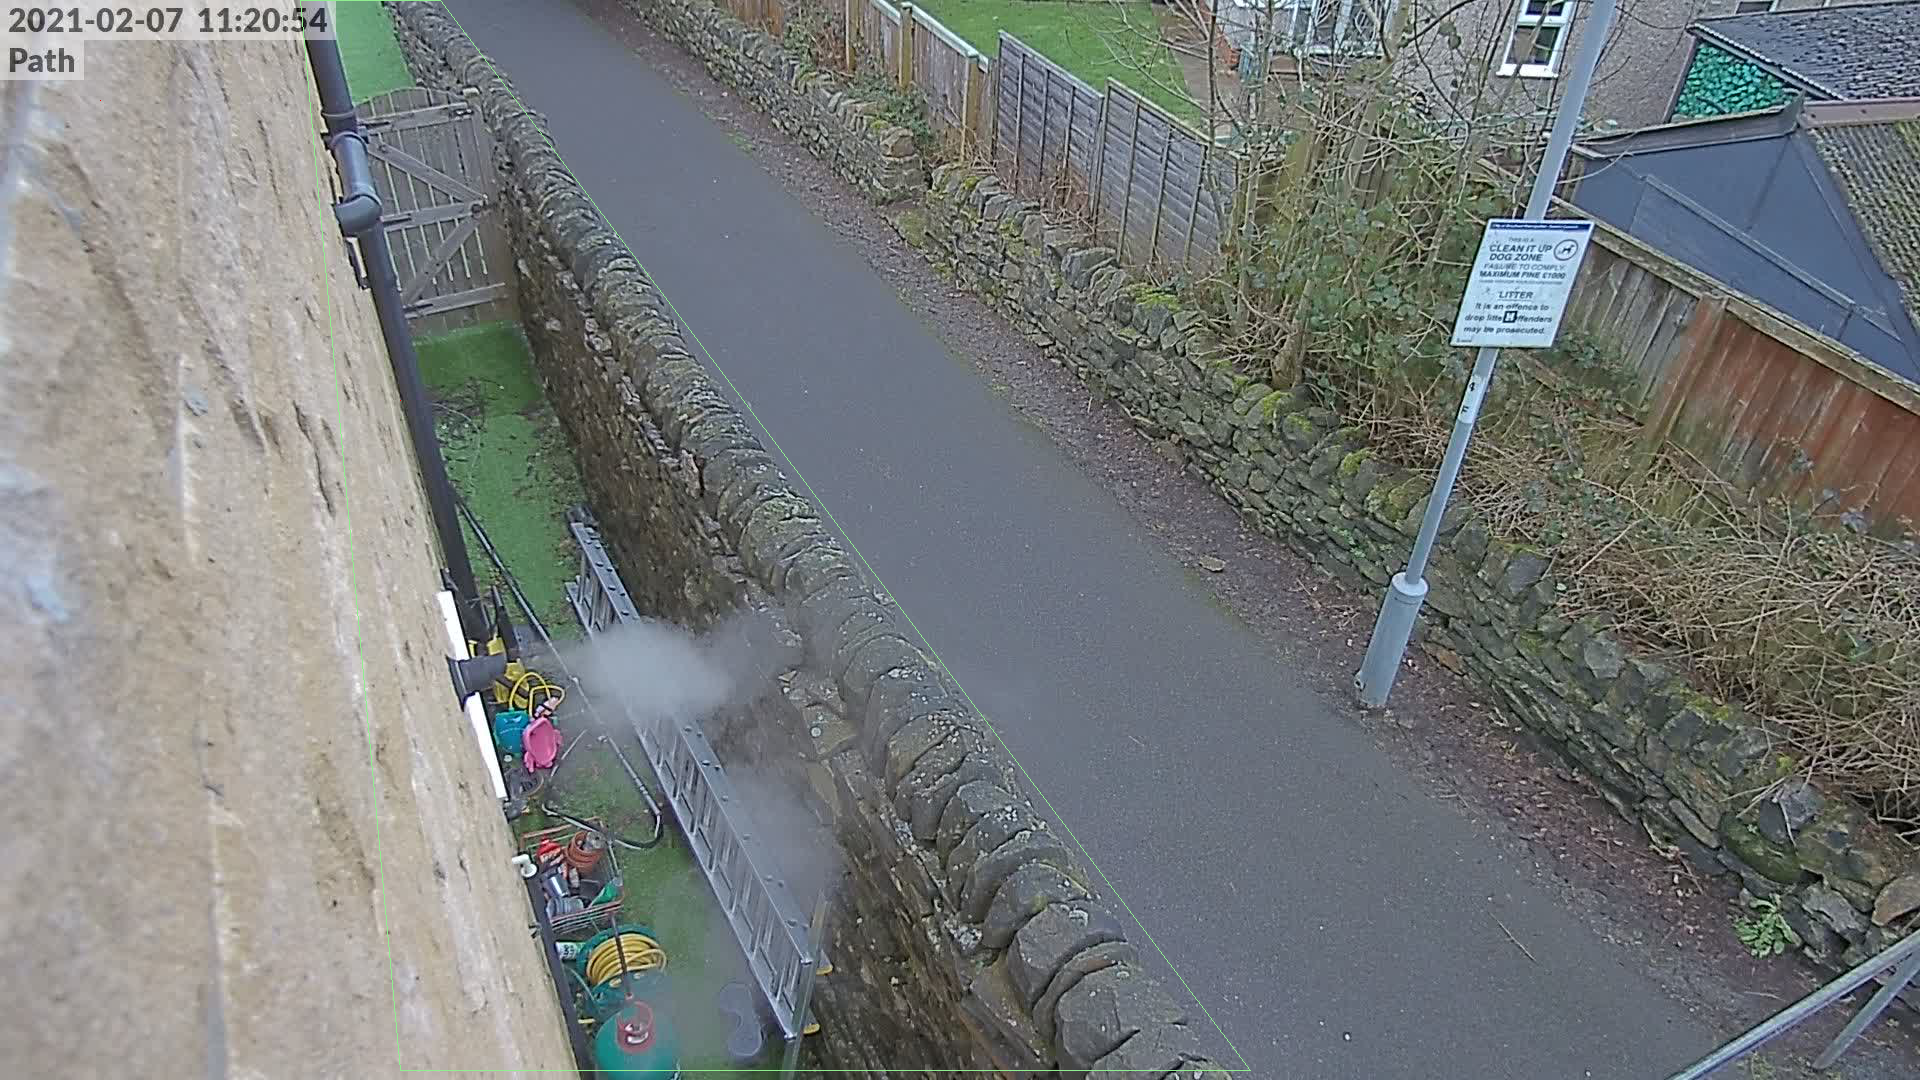

In [6]:
camera

In [7]:
print(test_point_1.within(poly)) # False
print(test_point_2.within(poly)) # True

False
True
